# Introduction
This Project involves the investagation of the datasets from Prosper loan data, get the insights from those datasets and visualize them. The main reason for choosing this datasets is that it is so much related to our daily lives. this is the prosper loan data set, which contains information about APR, Credit Score and related variables including borrower as well as lender information.This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
This project is divided into 3 analytical segments which are Univariate Plots, Bivariate Plots, and Multivariate Plots.

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

%matplotlib inline

# Assessing the Datasets from Prosper

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [3]:
# high-level overview of data shape 
df.shape

(113937, 81)

In [4]:
# high-level overview of data 
df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
72643,F25935560052751135B5601,634939,2012-09-06 00:39:31.480000000,NaN,60,Current,NaN,0.20931,0.1852,0.1752,...,-82.20,0.0,0.00,0.00,0.0,1.0,0,0,0.0,10
71305,3BC83599950455279B5704A,1168880,2014-01-27 15:36:58.493000000,NaN,36,Current,NaN,0.23438,0.1970,0.1870,...,0.00,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
110869,ECF835855234002699F2D26,865487,2013-08-09 13:32:08.447000000,NaN,60,Current,NaN,0.24282,0.2179,0.2079,...,-49.22,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
56998,F26435764044142116CDF24,746255,2013-04-08 17:42:42.823000000,NaN,36,Current,NaN,0.29537,0.2566,0.2466,...,-70.71,0.0,0.00,0.00,0.0,1.0,0,0,0.0,22
18886,730B33921077864546213CC,155467,2007-06-20 15:31:50.170000000,B,36,Completed,2009-10-30 00:00:00,0.11686,0.1099,0.0999,...,-93.71,0.0,0.00,0.00,0.0,1.0,0,0,0.0,178
63898,56D135090973778894457E2,497411,2011-03-09 16:00:39.203000000,NaN,36,Chargedoff,2011-11-24 00:00:00,0.29510,0.2599,0.2499,...,-16.51,0.0,5703.78,5703.78,0.0,1.0,0,0,0.0,70
109750,F90F360006745921333054C,1161036,2014-01-26 13:15:54.123000000,NaN,36,Current,NaN,0.23438,0.1970,0.1870,...,-2.68,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
60833,828A3594485963985EC5464,1026384,2013-11-06 17:07:06.580000000,NaN,60,Current,NaN,0.24036,0.2155,0.2055,...,-18.72,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
47578,1D5735778271439149FE355,760756,2013-04-24 20:37:52.640000000,NaN,36,Current,NaN,0.31790,0.2786,0.2686,...,-27.95,0.0,0.00,0.00,0.0,1.0,0,0,0.0,4
16409,E0FB3580910037294A2D951,816516,2013-06-20 14:05:29.620000000,NaN,60,Current,NaN,0.17522,0.1519,0.1419,...,-122.40,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1


In [5]:
# descriptive statistics for numeric variables
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
#Finding the columns having Null Values
df.isna().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [7]:
#removing the na values from Occupation
occupation_count = df.loc[df.Occupation.notnull()]
Occupation_count = occupation_count.Occupation.value_counts().head(20)

# Univariate Exploration of Data

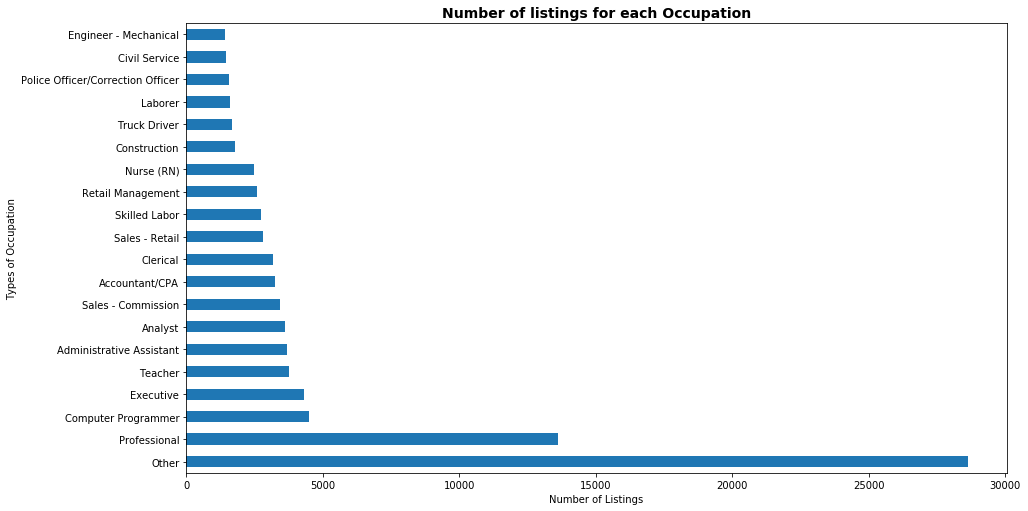

In [35]:
# plotting the bar graph
plt.figure(figsize=[14.7, 8.27])
color = sb.color_palette()[0]


Occupation_count.plot(kind='barh', color=color);

plt.title('Number of listings for each Occupation', fontsize = 14, weight = "bold");
plt.xlabel('Number of Listings');
plt.ylabel('Types of Occupation');


The above chart shows the most borrowers are from some other occupation and professional. Most Borrower doesnot show what actual their Occupation is.

In [9]:
#Checking if IncomeRange has any null values
(df.IncomeRange == 'Null').sum()

0

In [10]:
#counting the number of people for each income range
income_range_count = df.IncomeRange.value_counts()

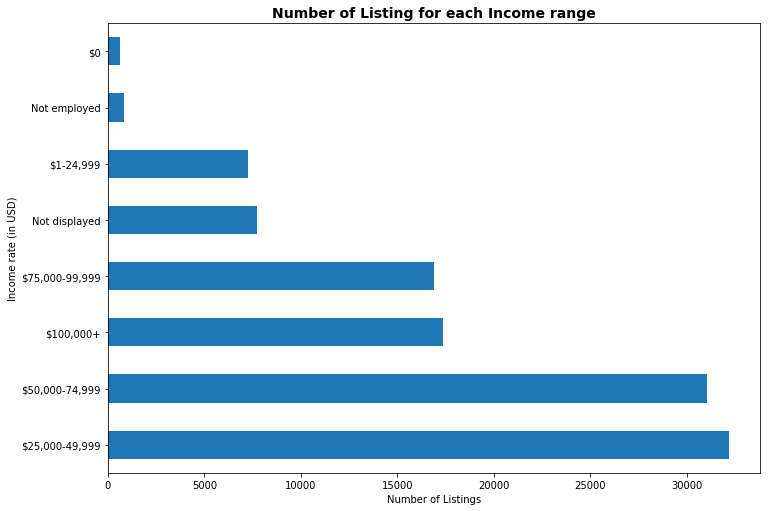

In [34]:
#Plotting the Bar graph
plt.figure(figsize= [11.69, 8.27])
income_range_count.plot(kind='barh', color=color)
plt.title('Number of Listing for each Income range', fontsize = 14, weight = "bold")
plt.xlabel('Number of Listings')
plt.ylabel('Income rate (in USD)');


The Bar graph is pretty clear that there are very less Borrower having low income or not employed at all. And also that most listings fall under 50000 dollars, followed by 50000-74999 dollars and so on. This also concludes that the more the income rate the less the listings count.

In [27]:
#selecting the current default palette
base_color = sb.color_palette()[0]

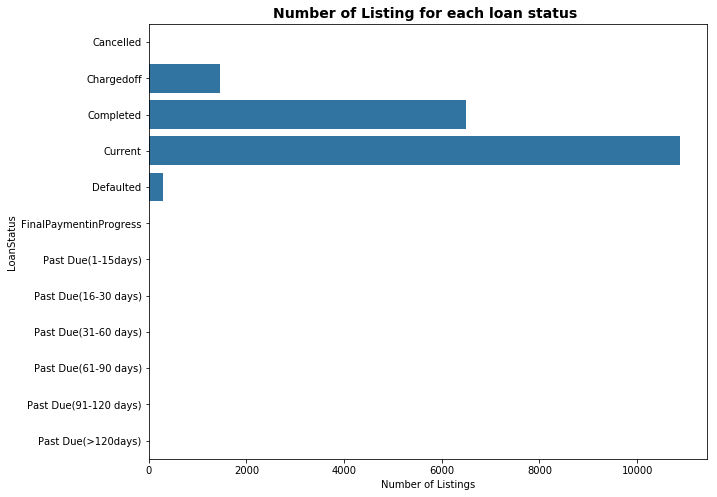

In [37]:
#Plotting the Bar graph
plt.figure(figsize=(10, 8))
order = ['Cancelled', 'Chargedoff', 'Completed','Current','Defaulted', 'FinalPaymentinProgress', 'Past Due(1-15days)','Past Due(16-30 days)' ,'Past Due(31-60 days)','Past Due(61-90 days)','Past Due(91-120 days)','Past Due(>120days)']
loan_order = pd.api.types.CategoricalDtype(ordered = True, categories = order)
df['LoanStatus']=df['LoanStatus'].astype(loan_order)
sb.countplot(data = df, y = 'LoanStatus', color = base_color)
plt.title('Number of Listing for each loan status ', fontsize = 14, weight = "bold")
plt.xlabel('Number of Listings')
plt.ylabel('LoanStatus');

Most of the loan status is under current status and very few in cancelled status. There is growth in Borrowing.

In [14]:
#APR with the most  count
df.BorrowerAPR.value_counts().head()

0.35797    3672
0.35643    1644
0.37453    1260
0.30532     902
0.29510     747
Name: BorrowerAPR, dtype: int64

In [15]:
#COunting BorrowerAPR with null values
df["BorrowerAPR"].isnull().sum()

25

In [16]:
#calculating the mean of BorrowerAPR
df.BorrowerAPR.mean()

0.218827655909788

In [17]:
#Filling the Null values with mean APR in BorrowerAPR column
df["BorrowerAPR"].fillna(df["BorrowerAPR"].mean(), inplace=True)
df["BorrowerAPR"].isnull().sum()

0

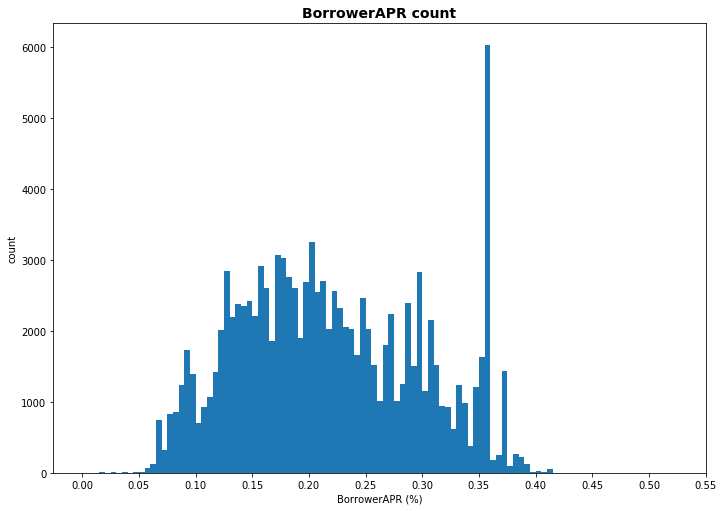

In [18]:
#plotting in histogram
plt.figure(figsize=[11.69, 8.27])
bins = np.arange(0, df['BorrowerAPR'].max(), 0.005)
plt.hist(data = df, x = 'BorrowerAPR', bins = bins)
plt.title('BorrowerAPR count', fontsize = 14, weight = "bold")
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('count')
plt.xticks(np.arange(0, df['BorrowerAPR'].max()+0.05, 0.05));

The BorrowerAPR with the high count looks 0.36 which higher than the mean value and second highest count of APR is below mean value i.e. 0.2.

In [19]:
#Counting each values of ProsporeScore
df['ProsperScore'].value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [20]:
#Finding the null values in ProsperScore
df["ProsperScore"].isnull().sum()

29084

In [21]:
#Removing the ProsperScore with Null values
df= df[df['ProsperScore'].isnull()==False]

In [22]:
#Checking if null values in ProsperScore are removed or not.
df["ProsperScore"].isnull().sum()

0

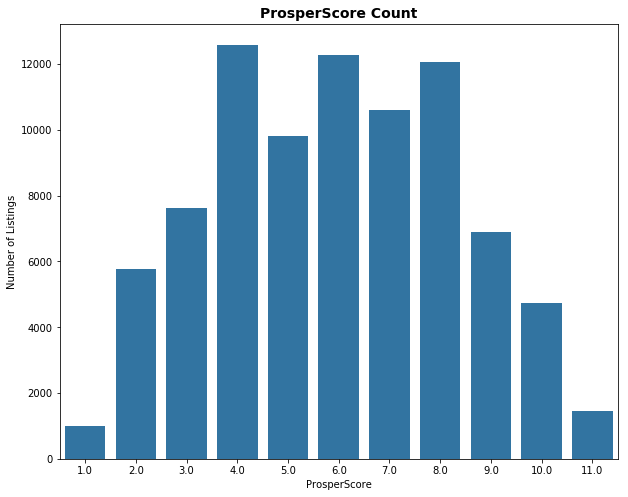

In [29]:
plt.figure(figsize=(10, 8))
sb.countplot(data = df, x = 'ProsperScore', color = base_color)
plt.title('ProsperScore Count', fontsize = 14, weight = "bold")
plt.xlabel('ProsperScore')
plt.ylabel('Number of Listings')
plt.fontsize = 15;


So the most borrower are with the low score.Higher the ProsperScore lower the chance to be borrower.

# Bivariate Exploration

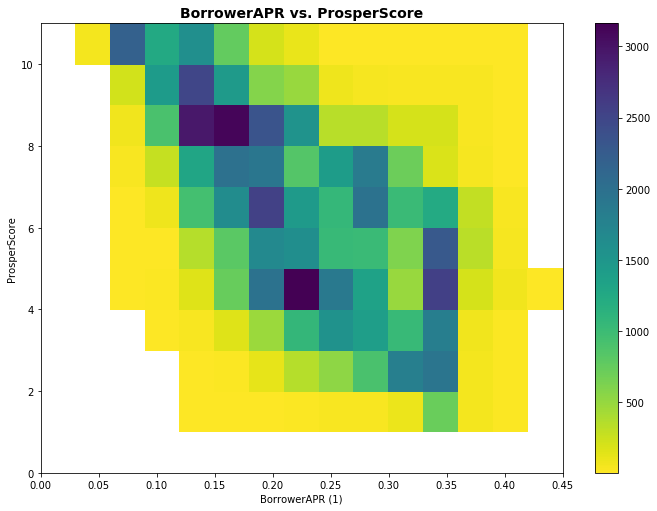

In [24]:
plt.figure(figsize =[11.69, 8.27])
plt.subplot(1, 1, 1)
bins_x = np.arange(0, df['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, df['ProsperScore'].max()+1, 1)
plt.hist2d(data = df, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.8)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore', fontsize = 14, weight = "bold")
plt.xlabel('BorrowerAPR (1)')
plt.ylabel('ProsperScore');

In [25]:
df[['BorrowerAPR','ProsperScore']].describe()

,BorrowerAPR,ProsperScore
count,84853.000000,84853.000000
mean,0.226658,5.950067
std,0.079916,2.376501
min,0.045830,1.000000
25%,0.163280,4.000000
50%,0.219450,6.000000
75%,0.292540,8.000000
max,0.423950,11.000000


The BorrowerAPR and the ProsperScore ahs negative realtion lower the ProsperScore higher the BorrowerAPR will be. This is pretty genuine that people with high score are more trust worthy for Borrowing.

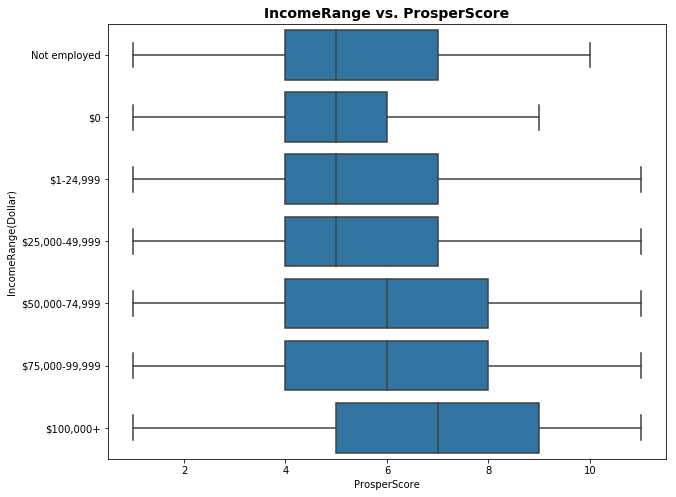

In [30]:
plt.figure(figsize = [14.7, 8.27])
order = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
plt.subplot(1, 1, 1)
sb.boxplot(data = df, x = 'ProsperScore', y = 'IncomeRange', color=color, order = order)

plt.gcf().set_size_inches(10, 8)
plt.title('IncomeRange vs. ProsperScore', fontsize =14, weight = "bold")
plt.xlabel('ProsperScore')
plt.ylabel('IncomeRange(Dollar)')
plt.xticks(rotation=0);


From the above boxplot people with 100k+ Income has the high median ProsperScore. The Median value of the ProsperScore decreases as the decrease in the income level.

In [31]:
#removing the null values from ProsperPrincipalBorrowed
df= df[df['ProsperPrincipalBorrowed'].isnull()==False]

In [32]:
#checking if there is null value
df["ProsperScore"].isnull().sum()

0

plot matrix of numeric features against categorical features.

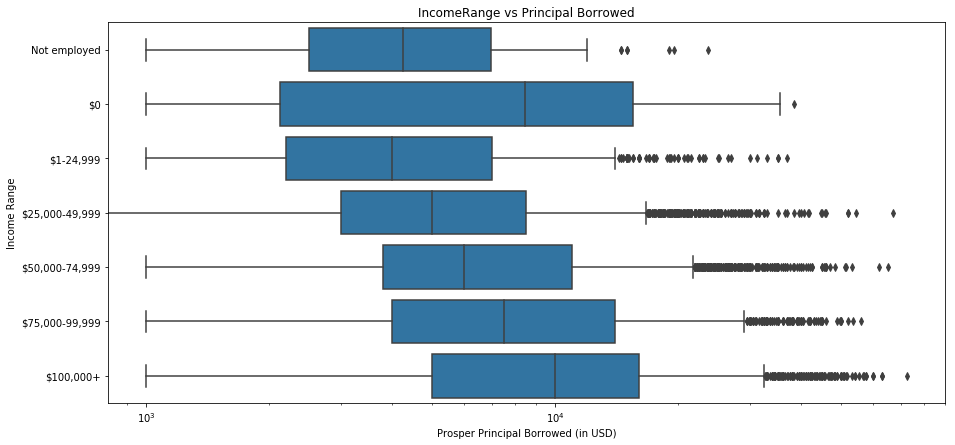

In [33]:
# ordering the x-axis.
plt.figure(figsize = [15, 7]) 
order = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']

# plots the boxplot
sb.boxplot(data=df, x='ProsperPrincipalBorrowed', y='IncomeRange', color=color, order=order);

# scale the y axis with log to analyze more accurately
plt.xscale('log')

plt.xticks(rotation=0)
plt.xlabel('Prosper Principal Borrowed (in USD)')
plt.ylabel('Income Range')
plt.title('IncomeRange vs Principal Borrowed');

From the boxplot we see that medians are in increasing order i.e., the more the income the more the principal amount borrowed from but exceptional applies for the not employed or 0 dollar salaried.

# Multiariate Exploration 

The main thing I want to explore in this part of the analysis is how the three numerical measures play into the relationship between Principal amount borrowed and APR.

<Figure size 841.68x595.44 with 0 Axes>

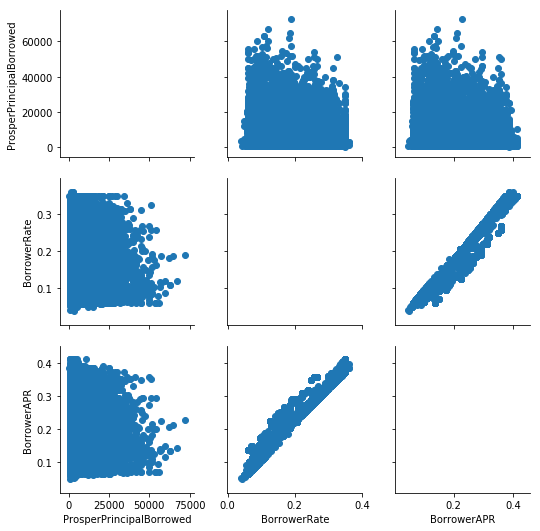

In [136]:
# plot matrix
plt.figure(figsize = [11.69, 8.27])
numeric_variable = ['ProsperPrincipalBorrowed','BorrowerRate','BorrowerAPR']
g= sb.PairGrid(data = df, vars  = loan_stats);
g= g.map_offdiag(plt.scatter);

There is negative relationship between BorrowerAPR and Borrowerrate with the ProsperPrincipalBorrowed. AT the less APR rate more Prosper amount is being borrowed. There indirect relation between APR and BorrowerRate i.e. less the BorrowerRate more the BorrowerAPR will be.

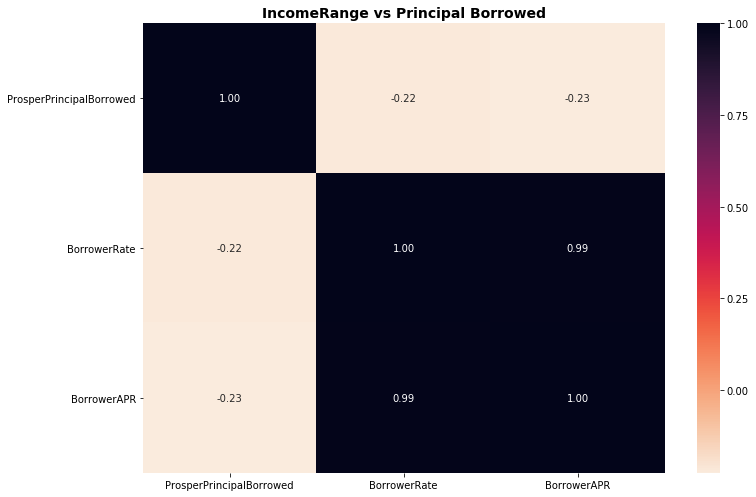

In [137]:
# correlation plot
plt.figure(figsize = [11.69, 8.27])
sb.heatmap(df[loan_stats].corr(),cmap='rocket_r',annot=True, fmt = '.2f')
plt.title('IncomeRange vs Principal Borrowed', fontsize= 14, weight = "bold")
plt.yticks(rotation = 0);

There is negative relationship between all the three variables ProsperPrincipalBorrowed, BorrowerRate and BorrowerAPR. None shows the strong positive correlation.